In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [2]:
%load_ext autoreload

In [3]:
%autoreload 1

In [4]:
fname = "./datos.csv"
data = pd.read_csv(fname, index_col=0)

In [5]:
data.index = data.index.astype("datetime64[ns]")
data.sort_index(ascending=True, inplace=True)

In [6]:
data.head()

,ALAGON_NR,GRISEN_NR,NOVILLAS_NR,TAUSTE_NR,TUDELA_NR,ZGZ_NR,RIESGO,pred_24h,pred_48h,pred_72h
time,,,,,,,,,,
2008-01-01 00:00:00,0.8100,0.4375,1.6000,0.2675,0.7875,0.74,False,0.750,0.7400,0.76
2008-01-01 01:00:00,0.8100,0.4725,1.6075,0.2650,0.7900,0.74,False,0.745,0.7325,0.76
2008-01-01 02:00:00,0.8100,0.5425,1.6100,0.2675,0.7900,0.74,False,0.740,0.7300,0.76
2008-01-01 03:00:00,0.8075,0.5500,1.6100,0.2600,0.7900,0.74,False,0.740,0.7200,0.76
2008-01-01 04:00:00,0.8000,0.5525,1.6025,0.2650,0.7900,0.74,False,0.740,0.7200,0.76


## MISSING VALUES

In [7]:
data.RIESGO.value_counts(True)

False    0.894905
True     0.105095
Name: RIESGO, dtype: float64

Be careful with "Class Imbalance Problem"

In [8]:
data.isnull().sum()

ALAGON_NR      16968
GRISEN_NR       8710
NOVILLAS_NR     1468
TAUSTE_NR        519
TUDELA_NR        277
ZGZ_NR             0
RIESGO             0
pred_24h           0
pred_48h           0
pred_72h           0
dtype: int64

In [9]:
data[data.RIESGO].describe()

,ALAGON_NR,GRISEN_NR,NOVILLAS_NR,TAUSTE_NR,TUDELA_NR,ZGZ_NR,pred_24h,pred_48h,pred_72h
count,8749.000000,9127.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000
mean,4.720665,0.716936,5.393815,0.871702,2.358498,2.866802,2.931624,2.858343,2.747299
std,1.128376,0.340471,1.055920,0.570977,0.691135,0.794981,0.723389,0.785311,0.838198
min,1.110000,0.080000,3.330000,0.280000,1.680000,0.742500,1.960000,1.390000,1.167500
25%,3.870000,0.630000,4.537500,0.687500,1.857500,2.338125,2.385000,2.275000,2.145625
50%,4.525000,0.680000,5.080000,0.810000,2.111250,2.670000,2.680000,2.632500,2.527500
75%,5.517500,0.740000,6.135000,0.920000,2.660000,3.296875,3.302500,3.300000,3.204375
max,7.895000,4.075000,8.377500,7.970000,5.847500,6.100000,6.100000,6.100000,6.100000


In [10]:
data[~data.RIESGO].describe()

,ALAGON_NR,GRISEN_NR,NOVILLAS_NR,TAUSTE_NR,TUDELA_NR,ZGZ_NR,pred_24h,pred_48h,pred_72h
count,70139.000000,78019.000000,84314.000000,85263.000000,85505.000000,85782.000000,85782.000000,85782.000000,85782.000000
mean,1.267372,0.380109,2.017798,0.582580,0.960376,1.072766,1.065233,1.073915,1.087024
std,0.790526,0.239753,0.866208,0.186993,0.231425,0.418409,0.399921,0.424683,0.463861
min,0.257500,0.070000,0.815000,0.225000,0.607500,0.470000,0.470000,0.470000,0.470000
25%,0.680000,0.135000,1.295000,0.480000,0.792500,0.785000,0.785000,0.785000,0.785000
50%,0.960000,0.360000,1.795000,0.560000,0.870000,0.900000,0.900000,0.900000,0.900000
75%,1.691250,0.610000,2.605000,0.660000,1.060000,1.290000,1.290000,1.290000,1.290000
max,4.780000,2.317500,5.082500,7.260000,1.687500,3.730000,2.597500,3.440000,4.370000


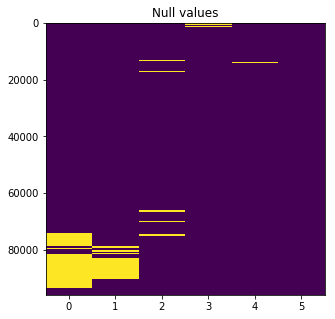

In [12]:
plt.figure(figsize=(5,5))
x = data.iloc[:, :6]
plt.title("Null values")
plt.imshow(X=x.isnull(), cmap="viridis", aspect="auto")

In [13]:
data_fixed = data.groupby(lambda x: x.weekofyear).transform(lambda x: x.fillna(x.mean()))

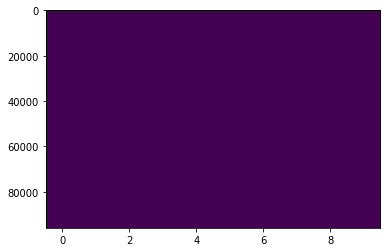

In [14]:
plt.imshow(X=data_fixed.isnull(), cmap="viridis", aspect="auto")

In [13]:
data.describe()

,ALAGON_NR,GRISEN_NR,NOVILLAS_NR,TAUSTE_NR,TUDELA_NR,ZGZ_NR,pred_24h,pred_48h,pred_72h
count,78888.000000,87146.000000,94388.000000,95337.000000,95579.000000,95856.000000,95856.000000,95856.000000,95856.000000
mean,1.650356,0.415385,2.378119,0.613130,1.107738,1.261311,1.261382,1.261450,1.261511
std,1.368470,0.272468,1.369618,0.271325,0.531573,0.725114,0.725078,0.725042,0.725009
min,0.257500,0.070000,0.815000,0.225000,0.607500,0.470000,0.470000,0.470000,0.470000
25%,0.710000,0.140000,1.340000,0.490000,0.800000,0.795000,0.795000,0.795000,0.795000
50%,1.062500,0.472500,1.937500,0.580000,0.900000,0.950000,0.950000,0.950000,0.950000
75%,2.140000,0.630000,3.035000,0.685000,1.197500,1.515000,1.515000,1.515000,1.515000
max,7.895000,4.075000,8.377500,7.970000,5.847500,6.100000,6.100000,6.100000,6.100000


In [14]:
data.groupby(lambda x: x.month).mean()

,ALAGON_NR,GRISEN_NR,NOVILLAS_NR,TAUSTE_NR,TUDELA_NR,ZGZ_NR,RIESGO,pred_24h,pred_48h,pred_72h
1,2.137726,0.606421,3.087023,0.565118,1.321004,1.573220,0.150049,1.591595,1.613380,1.638151
2,3.082789,0.660772,3.915865,0.633656,1.655321,2.027292,0.378483,2.032733,2.041166,2.048510
3,2.926124,0.551331,3.754579,0.687520,1.599766,1.983190,0.374389,1.982518,1.976923,1.968279
4,2.111300,0.432588,3.037436,0.741153,1.311910,1.628082,0.133460,1.606292,1.584230,1.562611
5,1.573849,0.340689,2.295222,0.650465,1.049885,1.208529,0.036779,1.203490,1.201757,1.205633
6,1.442344,0.328713,2.124300,0.644357,1.042528,1.158551,0.078409,1.146457,1.131321,1.112703
7,0.739860,0.200811,1.445410,0.587667,0.833647,0.790981,0.000000,0.786567,0.782624,0.778193
8,0.597925,0.156826,1.255572,0.575438,0.797711,0.723237,0.000000,0.724888,0.726402,0.728970
9,0.728354,0.191001,1.380278,0.608028,0.816247,0.813551,0.000000,0.814739,0.815817,0.815852
10,0.811046,0.388070,1.451978,0.609028,0.806594,0.848595,0.002444,0.851310,0.854061,0.859026


In [21]:
data.query("RIESGO==True").groupby(lambda x: x.month).mean()

,ALAGON_NR,GRISEN_NR,NOVILLAS_NR,TAUSTE_NR,TUDELA_NR,ZGZ_NR,RIESGO,pred_24h,pred_48h,pred_72h
1,5.236470,0.651200,5.891130,0.763632,2.662347,3.057573,True,3.219450,3.183414,3.054721
2,4.964809,0.709416,5.613288,0.783830,2.470126,2.995018,True,3.035461,3.010265,2.948530
3,4.846224,0.728358,5.322966,0.832712,2.320765,2.906376,True,2.921601,2.854452,2.754997
4,4.345748,0.811744,5.385941,1.358226,2.386123,3.054217,True,3.046464,2.923124,2.785830
5,3.889430,0.749261,4.699045,0.822874,1.939086,2.282400,True,2.456221,2.373173,2.353364
6,4.564816,0.700942,5.180894,0.983527,2.236940,2.715169,True,2.813603,2.655809,2.393837
10,4.181375,0.633250,4.904750,6.164750,1.954500,2.308750,True,2.616500,1.633000,1.260875
11,3.636579,0.639361,4.736688,0.717184,1.951961,2.035790,True,2.359598,2.129375,1.859928
12,3.883803,0.717500,4.696270,0.673877,1.947385,2.300566,True,2.414074,2.309295,2.200258


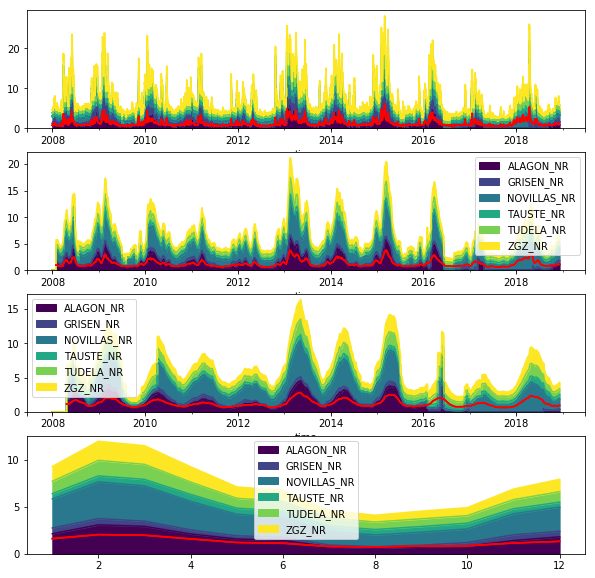

In [16]:
#fig, axis = plt.subplots(3,1, figsize=(10,10), sharey=True)
#ax1, ax2, ax3 = axis.flatten()
fig = plt.figure(figsize=(10,10))
row = 4
col = 1
ax = fig.add_subplot(row,col,1)
data.loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax, legend=False)
data.loc[:, "pred_24h"].plot(ax=ax, legend=False, color="red")
data.loc[:, "pred_48h"].plot(ax=ax, legend=False, color="red")
data.loc[:, "pred_72h"].plot(ax=ax, legend=False, color="red")

ax = fig.add_subplot(row, col, 2)
win = 24 * 7 * 4
roll_data = data.rolling(win).mean()
roll_data.loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax)
roll_data.loc[:, "pred_24h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_48h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_72h"].plot(color="red", ax=ax)

ax = fig.add_subplot(row, col, 3)
win = 24 * 7 * 4 * 4
roll_data = data.rolling(win).mean()
roll_data.loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax)
roll_data.loc[:, "pred_24h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_48h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_72h"].plot(color="red", ax=ax)

ax = fig.add_subplot(row, col, 4)
data.groupby(lambda x: x.month).mean().loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax)
data.groupby(lambda x: x.month).mean().loc[:, "pred_24h"].plot(color="red", ax=ax)
data.groupby(lambda x: x.month).mean().loc[:, "pred_48h"].plot(color="red", ax=ax)
data.groupby(lambda x: x.month).mean().loc[:, "pred_72h"].plot(color="red", ax=ax)

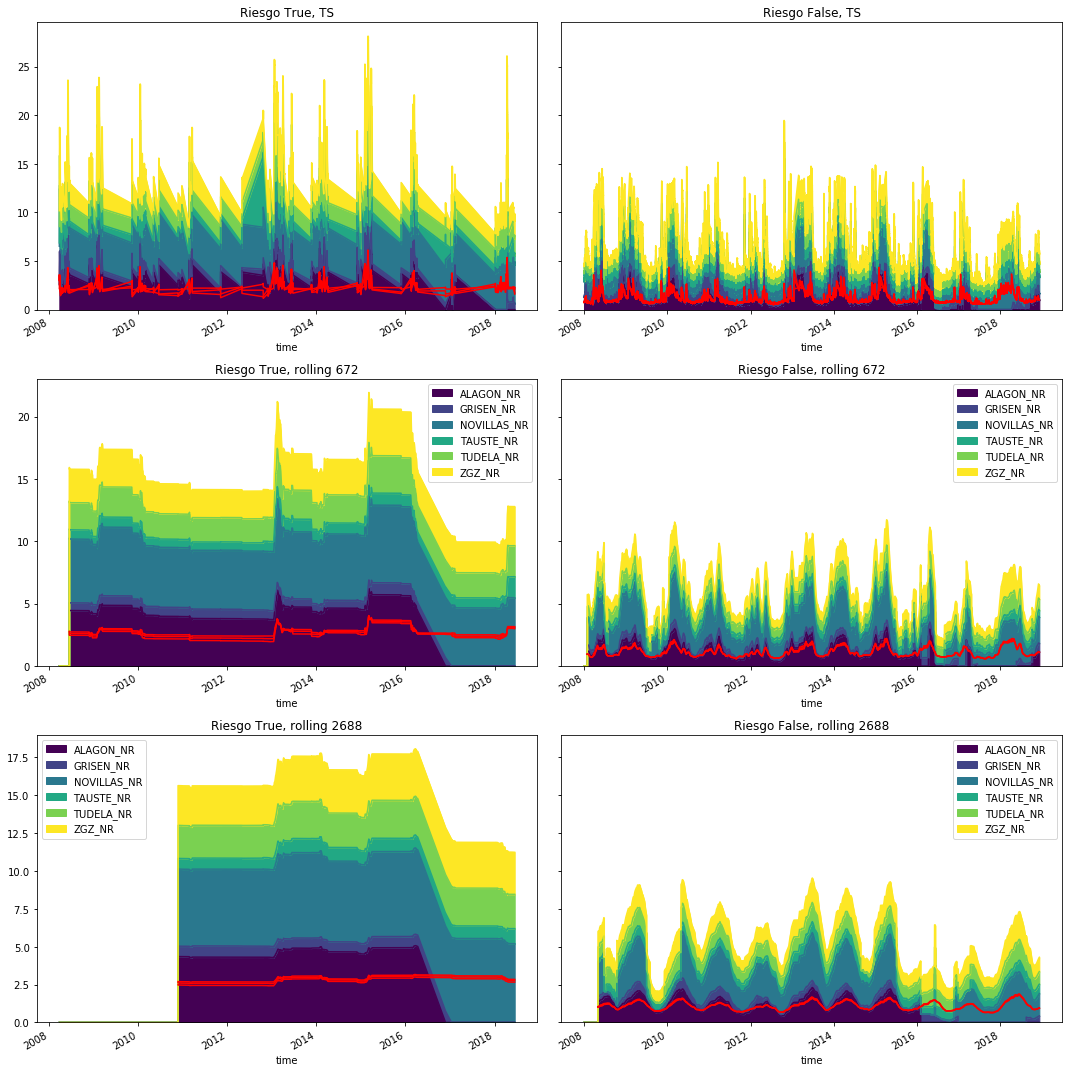

In [17]:
fig = plt.figure(figsize=(15,15))
row = 3
col = 2
ax = fig.add_subplot(row,col,1)
ax.set_title("Riesgo True, TS")
data.query("RIESGO==True").loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax, legend=False)
data.query("RIESGO==True").loc[:, "pred_24h"].plot(ax=ax, legend=False, color="red")
data.query("RIESGO==True").loc[:, "pred_48h"].plot(ax=ax, legend=False, color="red")
data.query("RIESGO==True").loc[:, "pred_72h"].plot(ax=ax, legend=False, color="red")

ax = fig.add_subplot(row,col,2, sharey=ax)
ax.set_title("Riesgo False, TS")
data.query("RIESGO==False").loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax, legend=False)
data.query("RIESGO==False").loc[:, "pred_24h"].plot(ax=ax, legend=False, color="red")
data.query("RIESGO==False").loc[:, "pred_48h"].plot(ax=ax, legend=False, color="red")
data.query("RIESGO==False").loc[:, "pred_72h"].plot(ax=ax, legend=False, color="red")

ax = fig.add_subplot(row, col, 3)
win = 24 * 7 * 4
ax.set_title(f"Riesgo True, rolling {win}")
roll_data = data.query("RIESGO==True").rolling(win).mean()
roll_data.loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax)
roll_data.loc[:, "pred_24h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_48h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_72h"].plot(color="red", ax=ax)

ax = fig.add_subplot(row, col, 4, sharey=ax)
ax.set_title(f"Riesgo False, rolling {win}")
roll_data = data.query("RIESGO==False").rolling(win).mean()
roll_data.loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax)
roll_data.loc[:, "pred_24h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_48h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_72h"].plot(color="red", ax=ax)

ax = fig.add_subplot(row, col, 5)
win = 24 * 7 * 4 * 4
ax.set_title(f"Riesgo True, rolling {win}")
roll_data = data.query("RIESGO==True").rolling(win).mean()
roll_data.loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax)
roll_data.loc[:, "pred_24h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_48h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_72h"].plot(color="red", ax=ax)

ax = fig.add_subplot(row, col, 6, sharey=ax)
ax.set_title(f"Riesgo False, rolling {win}")
roll_data = data.query("RIESGO==False").rolling(win).mean()
roll_data.loc[:, :"ZGZ_NR"].plot.area(cmap="viridis", ax=ax)
roll_data.loc[:, "pred_24h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_48h"].plot(color="red", ax=ax)
roll_data.loc[:, "pred_72h"].plot(color="red", ax=ax)

plt.tight_layout()

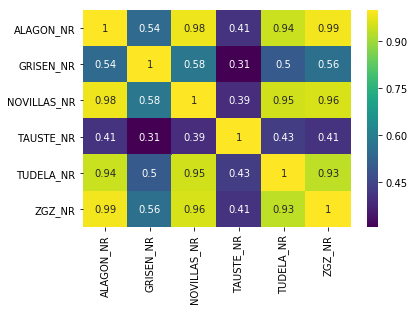

In [22]:
data.loc[:, :"ZGZ_NR"].corr()
sns.heatmap(data.loc[:, :"ZGZ_NR"].corr(), cmap="viridis", annot=True)

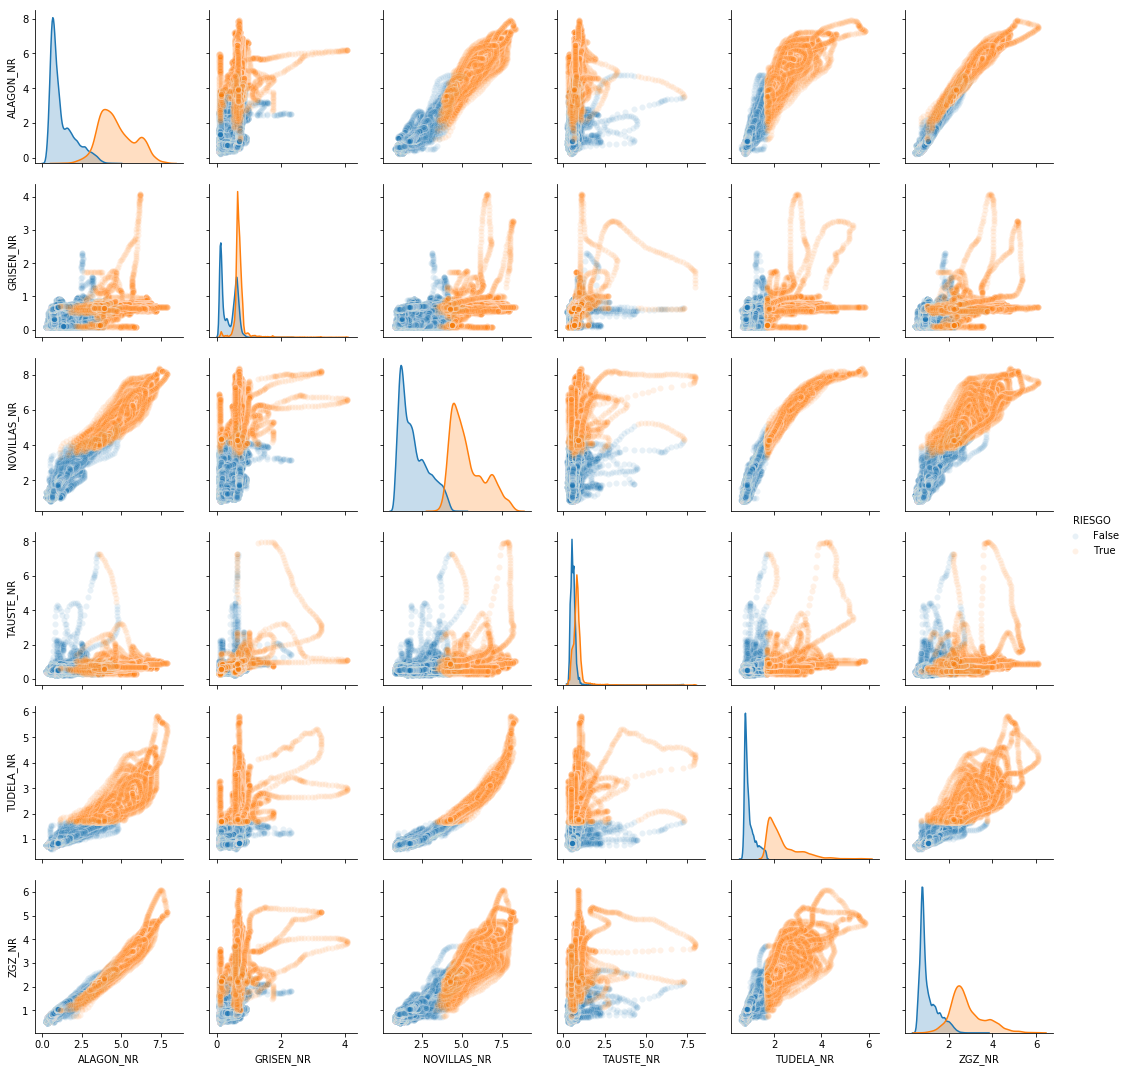

In [23]:
sns.pairplot(data, vars=data.iloc[:, :6].columns, kind='scatter', diag_kind="kde", hue="RIESGO",  plot_kws={'alpha': 0.1, 'cmap': 'viridis'})

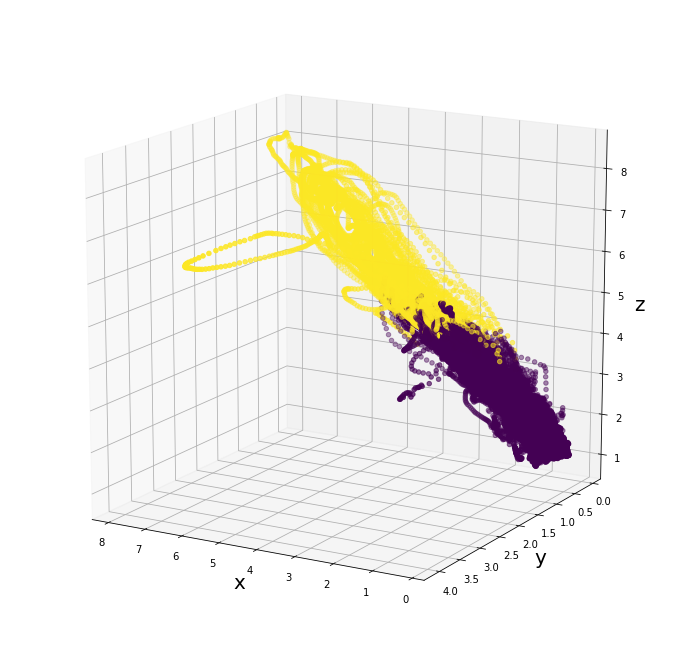

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x", size=20)
ax.set_ylabel("y", size=20)
ax.set_zlabel("z", size=20)
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=data.RIESGO, cmap="viridis")
# ax.plot(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2])
ax.view_init(15, 120)
plt.show()


In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_fixed.iloc[:, :5] - data_fixed.iloc[:, :5].mean())

In [27]:
# %matplotlib notebook

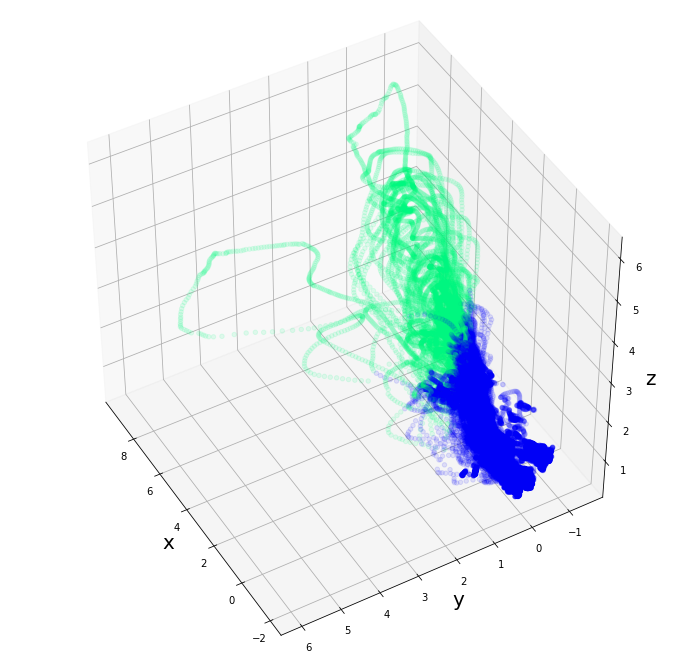

In [28]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x", size=20)
ax.set_ylabel("y", size=20)
ax.set_zlabel("z", size=20)
ax.scatter(*data_pca.T, data.ZGZ_NR.values, c=data.RIESGO, cmap="winter", alpha=0.1)
ax.view_init(45, 150)
plt.show()


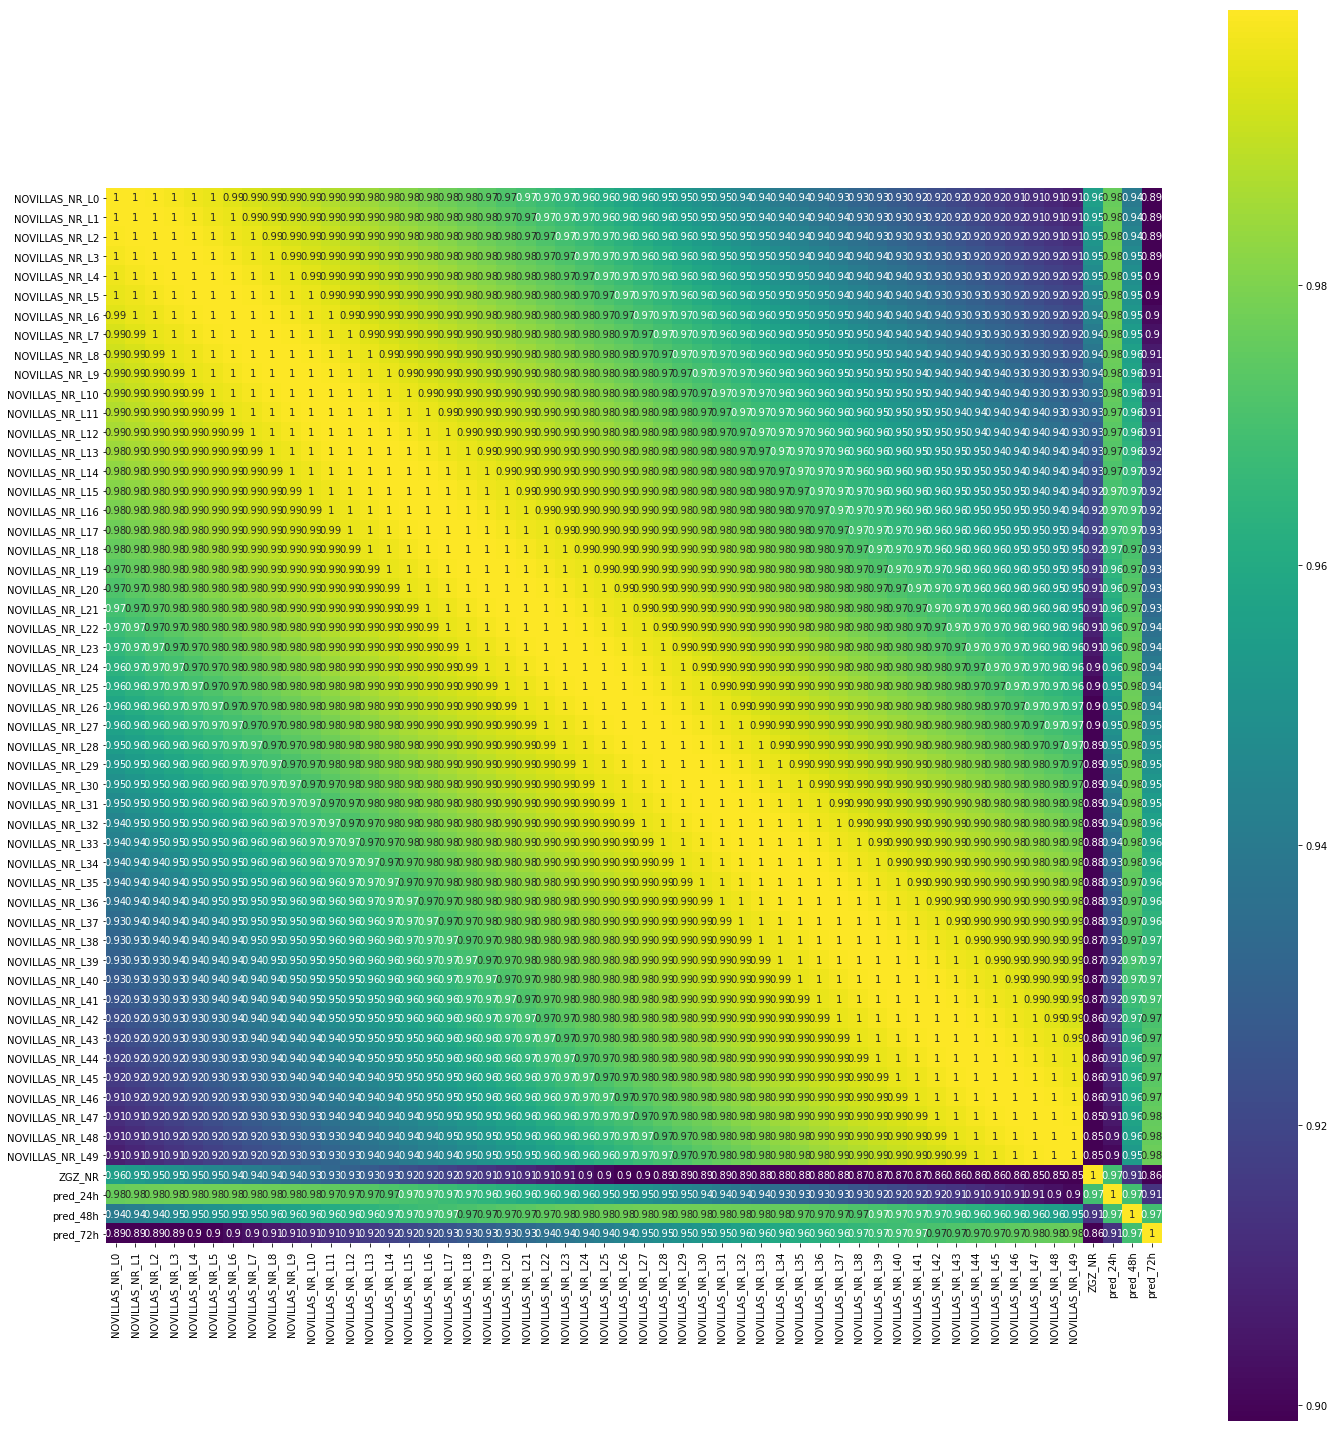

In [45]:
lag_list = np.arange(0, 25 * 2)
x = data_fixed.iloc[:, 2]
store = []
name = x.name
for lag in lag_list:
    store.append(x.shift(-lag))

suffix_list = (" ".join(["%s"] * len(lag_list))  % tuple(lag_list)).split()
df = pd.concat(store, axis=1)
df.columns = [f"{c}_L{l}" for c, l in zip(df.columns, lag_list)]

plt.figure(figsize=(20,20))
feat = data_fixed.loc[:, ["ZGZ_NR", "pred_24h", "pred_48h", "pred_72h"]]
sns.heatmap(pd.concat([df, feat], axis=1).corr(), cmap="viridis", robust=True, square=True, annot=True)
plt.tight_layout()

NameError: name 'df' is not defined

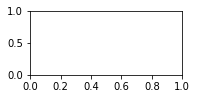

In [36]:
fig = plt.figure()
row, col = (3, 2)

ax = fig.add_subplot(row, col, 1)
pd.concat([df.iloc[:, 5], data.pred_24h], axis=1)[data.RIESGO].plot(ax=ax)
ax = fig.add_subplot(row, col, 3)
pd.concat([df.iloc[:, 25], data.pred_48h], axis=1)[data.RIESGO].plot(ax=ax)
ax = fig.add_subplot(row, col, 5)
pd.concat([df.iloc[:, 50], data.pred_72h], axis=1)[data.RIESGO].plot(ax=ax)

ax = fig.add_subplot(row, col, 2)
pd.concat([df.iloc[:, 5], data.pred_24h], axis=1)[data.RIESGO].plot(ax=ax)
ax = fig.add_subplot(row, col, 4)
pd.concat([df.iloc[:, 25], data.pred_48h], axis=1)[data.RIESGO].plot(ax=ax)
ax = fig.add_subplot(row, col, 6)
pd.concat([df.iloc[:, 50], data.pred_72h], axis=1)[data.RIESGO].plot(ax=ax)

In [41]:
data.iloc[:, 8]

time
2008-01-01 00:00:00    0.7400
2008-01-01 01:00:00    0.7325
2008-01-01 02:00:00    0.7300
2008-01-01 03:00:00    0.7200
2008-01-01 04:00:00    0.7200
2008-01-01 05:00:00    0.7275
2008-01-01 06:00:00    0.7375
2008-01-01 07:00:00    0.7475
2008-01-01 08:00:00    0.7525
2008-01-01 09:00:00    0.7575
2008-01-01 10:00:00    0.7600
2008-01-01 11:00:00    0.7600
2008-01-01 12:00:00    0.7600
2008-01-01 13:00:00    0.7600
2008-01-01 14:00:00    0.7600
2008-01-01 15:00:00    0.7600
2008-01-01 16:00:00    0.7600
2008-01-01 17:00:00    0.7700
2008-01-01 18:00:00    0.7700
2008-01-01 19:00:00    0.7700
2008-01-01 20:00:00    0.7675
2008-01-01 21:00:00    0.7700
2008-01-01 22:00:00    0.7600
2008-01-01 23:00:00    0.7600
2008-01-02 00:00:00    0.7600
2008-01-02 01:00:00    0.7600
2008-01-02 02:00:00    0.7600
2008-01-02 03:00:00    0.7600
2008-01-02 04:00:00    0.7600
2008-01-02 05:00:00    0.7600
                        ...  
2018-12-06 18:00:00    1.0300
2018-12-06 19:00:00    1.0300
2018-

In [26]:
utils.crosscorr(x, y, 50)

NameError: name 'y' is not defined

In [34]:
def crosscorr(x, y, nlags):
   xdm = x - np.mean(x)
   ydm = y - np.mean(y)
   lags = np.arange(-nlags+1, nlags)
   allag =  np.arange(-x.shape[0] + 1, x.shape[0])
   crosscorr = np.correlate(xdm, ydm, mode='full')
   crosscorr /= x.shape[0] * np.std(x) * np.std(y)
   out = pd.Series(crosscorr, index=allag)
   return out.loc[lags]

In [35]:
x = data_fixed.iloc[:, 0]
y = data_fixed.iloc[:, 6]

In [38]:
data_fixed.columns[6]

'RIESGO'

In [39]:
maxlags = 100
y = data_fixed.iloc[:, 5]
# y = data_fixed.iloc[:, 7]
_xcorr = lambda x: utils.xcorr(x, y, maxlags=maxlags)[1]
data_fixed.apply(_xcorr)

,ALAGON_NR,GRISEN_NR,NOVILLAS_NR,TAUSTE_NR,TUDELA_NR,ZGZ_NR,RIESGO,pred_24h,pred_48h,pred_72h
0,0.921707,0.871944,0.958370,0.868503,0.957739,0.951345,58.671687,0.962626,0.975797,0.989731
1,0.922212,0.872149,0.958820,0.868789,0.958232,0.951783,58.760483,0.963145,0.976384,0.990288
2,0.922721,0.872352,0.959272,0.869075,0.958729,0.952224,58.850162,0.963666,0.976972,0.990837
3,0.923235,0.872555,0.959728,0.869361,0.959229,0.952667,58.940756,0.964191,0.977560,0.991378
4,0.923753,0.872755,0.960187,0.869646,0.959733,0.953113,59.032339,0.964717,0.978148,0.991909
5,0.924276,0.872954,0.960649,0.869930,0.960241,0.953561,59.124748,0.965247,0.978736,0.992430
6,0.924805,0.873151,0.961114,0.870213,0.960752,0.954012,59.218057,0.965779,0.979324,0.992940
7,0.925338,0.873347,0.961582,0.870496,0.961266,0.954465,59.312353,0.966313,0.979912,0.993439
8,0.925877,0.873544,0.962052,0.870778,0.961783,0.954921,59.407560,0.966850,0.980500,0.993925
9,0.926421,0.873740,0.962526,0.871060,0.962304,0.955380,59.503688,0.967391,0.981088,0.994398


In [44]:
_.to_pickle("./data_fixed_xcorr_zgz_100.pkl")

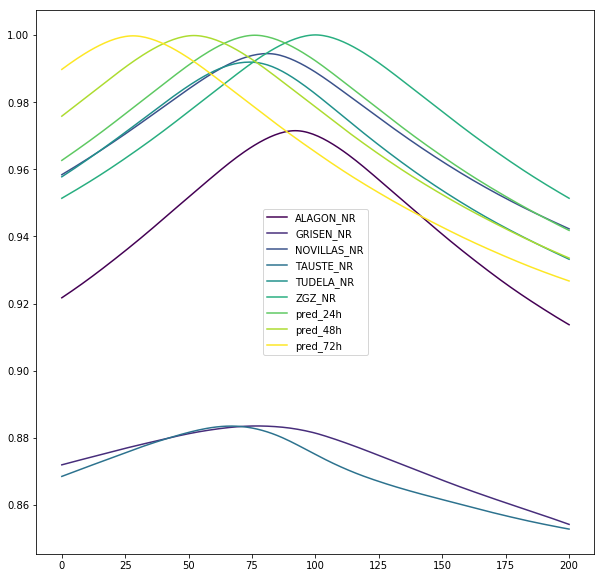

In [49]:
_39.drop("RIESGO", axis=1).plot(cmap="viridis", figsize=(10,10))

In [50]:
_39.idxmax()

ALAGON_NR       92
GRISEN_NR       77
NOVILLAS_NR     81
TAUSTE_NR       67
TUDELA_NR       74
ZGZ_NR         100
RIESGO          78
pred_24h        76
pred_48h        52
pred_72h        28
dtype: int64